# Clustering
Clustering is a type of unsupervised learning where the goal is to group similar data points into clusters or groups. Each group contains data points that are more similar to each other than to those in other groups. The primary objective is to discover hidden patterns or structures in data without prior labels or supervision.

In essence, clustering attempts to divide a dataset into subgroups that share common traits or features, with the aim of finding natural groupings in the data.



# Algorithms

## K-Nearest Neighbors (KNN)
- It is the simplest technique and basic algorithm for clustering
- We first choose k initial centroids, where k is user specified parameter namely, the number of cluster desired
- Each point is then assigned to the closest centroid, and each collection of points assigned to a centroid is a cluster
- We repeat the assignment and update steps until no point change cluster, or equivalently until centroids remain the same

**Calculate Distance**
- Manhattan Distance
$$
dis. = |x_{i} - y_{i}|
$$

- Euclidean Distance (Most Common)
$$
dist. = \sqrt{(x_{i} - y_{i})^{2}}
$$


In [23]:
import numpy as np
import pandas as pd

In [44]:
# Set random seed for reproducibility
np.random.seed(42)

# Cluster 1 - center at (2, 2) with a standard deviation of 0.5
cluster_1 = np.random.randn(100, 2) * 0.5 + np.array([2, 2])

# Cluster 2 - center at (8, 8) with a standard deviation of 0.5
cluster_2 = np.random.randn(100, 2) * 0.5 + np.array([8, 8])

# Combine both clusters into a single dataset
X = np.vstack([cluster_1, cluster_2])

In [45]:
df = pd.DataFrame(X, columns=['x', 'y'])
df.head()

,x,y
0,2.248357,1.930868
1,2.323844,2.761515
2,1.882923,1.882932
3,2.789606,2.383717
4,1.765263,2.271280


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

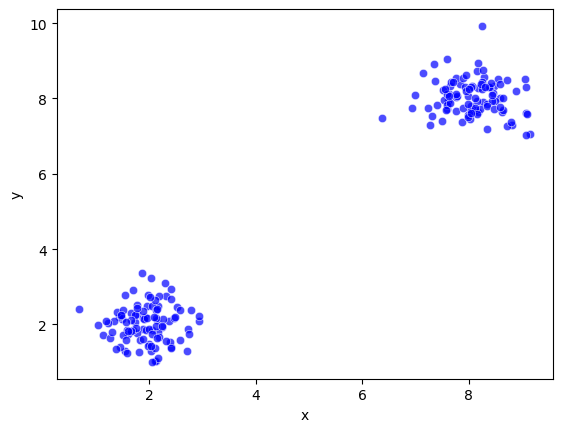

In [56]:
sns.scatterplot(data=df, x='x', y='y', color='blue', alpha=0.7)
plt.show()

In [46]:
def compute_distance(cx, cy, df):
    df['distance'] = np.sqrt((df['x'] - cx[0])**2 + (df['y'] - cy[1])**2)
    return df

In [59]:
k = 2
centroid = []
for i in range(k):
    centroid.append((np.random.rand(), np.random.rand()))
centroid

[(0.8129010091300776, 0.9997176732861306),
 (0.9966368370739054, 0.5554317056026274)]

In [60]:
while True:
    current_centroids = []
    # Step 1: Assign each point to the nearest centroid
    df['centroid'] = df.apply(lambda row: np.argmin([np.sqrt((row['x'] - c[0])**2 + (row['y'] - c[1])**2) for c in centroid]), axis=1)

    # Step 2: Compute the new centroids by taking the mean of points assigned to each centroid
    for i in range(k):
        cluster_points = df[df['centroid'] == i]
        new_centroid = [cluster_points['x'].mean(), cluster_points['y'].mean()]  # Calculate mean of x and y
        current_centroids.append(new_centroid)
    
    print("Updated Centroids:", current_centroids)

    # Step 3: Check for convergence
    if np.allclose(current_centroids, centroid):  # Check if centroids have converged
        print("Centroids have converged!")
        break
    
    # Step 4: Update the centroids for the next iteration
    centroid = current_centroids

Updated Centroids: [[np.float64(5.101925869454566), np.float64(5.1586220617370735)], [np.float64(2.280361526648836), np.float64(1.1802058237358246)]]
Updated Centroids: [[np.float64(8.064124362306924), np.float64(8.021743824591951)], [np.float64(1.942217872605805), np.float64(2.0170111622221096)]]
Updated Centroids: [[np.float64(8.064124362306924), np.float64(8.021743824591951)], [np.float64(1.942217872605805), np.float64(2.0170111622221096)]]
Centroids have converged!


In [61]:
centroid

[[np.float64(8.064124362306924), np.float64(8.021743824591951)],
 [np.float64(1.942217872605805), np.float64(2.0170111622221096)]]

TypeError: list indices must be integers or slices, not tuple

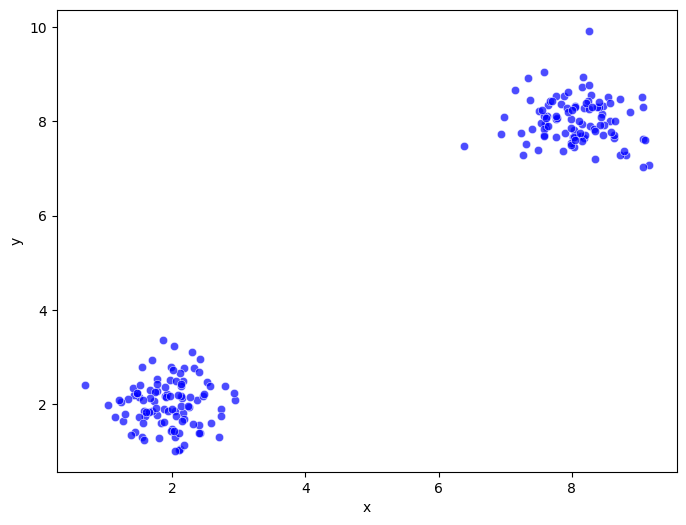

In [65]:
# Plot the scatter plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='x', y='y', color='blue', alpha=0.7)

# Plot the centroids on top of the scatter plot
plt.scatter(centroid[:, 0], centroid[:, 1], color='red', marker='X', s=100, label='Centroids')

# Title and labels
plt.title('Scatter Plot with Centroids')
plt.xlabel('x')
plt.ylabel('y')

# Show the legend
plt.legend()

# Display the plot
plt.show()